In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import random
import os
import glob
import cv2

In [ ]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


def get_data():
    train_dir = "/content/drive/MyDrive/data/MP_data/"
    X = []
    y = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 32, 32)
            X.append(img)
            y.append(j)
    return X,y

In [ ]:
X, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [ ]:
#converted images into numpy array
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(5105, 32, 32, 3) (5105,)


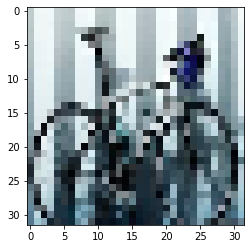

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[100])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#X_train = np.reshape(X_train, (X_train.shape[0], -1))
#X_val = np.reshape(X_val, (X_val.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Training data shape:  (3573, 32, 32, 3)
Validation data shape:  (1532, 32, 32, 3)


In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [ ]:
print(y_train.shape)

(3573,)


In [ ]:
y_train

array([5, 1, 6, ..., 5, 6, 1])

In [ ]:
X_train

array([[[[0.07843137, 0.45882353, 0.62745098],
         [0.38039216, 0.61960784, 0.6745098 ],
         [0.43921569, 0.65882353, 0.70196078],
         ...,
         [0.90980392, 0.8745098 , 0.83529412],
         [0.90588235, 0.88235294, 0.83921569],
         [0.8745098 , 0.8745098 , 0.82745098]],

        [[0.07058824, 0.4627451 , 0.62745098],
         [0.41176471, 0.61960784, 0.66666667],
         [0.43921569, 0.66666667, 0.71372549],
         ...,
         [0.90980392, 0.88235294, 0.83137255],
         [0.90588235, 0.87843137, 0.83921569],
         [0.90196078, 0.87843137, 0.83529412]],

        [[0.16862745, 0.46666667, 0.61176471],
         [0.3254902 , 0.49411765, 0.4745098 ],
         [0.42745098, 0.65882353, 0.70196078],
         ...,
         [0.90980392, 0.8745098 , 0.82352941],
         [0.91372549, 0.87058824, 0.83137255],
         [0.89803922, 0.8745098 , 0.83137255]],

        ...,

        [[0.01176471, 0.29019608, 0.43921569],
         [0.01568627, 0.25882353, 0.41568627]

In [ ]:
##Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=15)

Epoch 1/15
112/112 [==============================] - 9s 76ms/step - loss: 1.9880 - accuracy: 0.3014
Epoch 2/15
112/112 [==============================] - 8s 75ms/step - loss: 1.7246 - accuracy: 0.4170
Epoch 3/15
112/112 [==============================] - 8s 75ms/step - loss: 1.6266 - accuracy: 0.4470
Epoch 4/15
112/112 [==============================] - 8s 75ms/step - loss: 1.5428 - accuracy: 0.4853
Epoch 5/15
112/112 [==============================] - 8s 75ms/step - loss: 1.4835 - accuracy: 0.5108
Epoch 6/15
112/112 [==============================] - 8s 76ms/step - loss: 1.4249 - accuracy: 0.5343
Epoch 7/15
112/112 [==============================] - 9s 76ms/step - loss: 1.3823 - accuracy: 0.5477
Epoch 8/15
112/112 [==============================] - 9s 77ms/step - loss: 1.3410 - accuracy: 0.5654
Epoch 9/15
112/112 [==============================] - 9s 76ms/step - loss: 1.2805 - accuracy: 0.5858
Epoch 10/15
112/112 [==============================] - 8s 75ms/step - loss: 1.2301 - accura

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_val)
y_pred_classes = [np.argmax(element) for element in y_pred]
#cm=confusion_matrix(y_val,y_pred)
print("Classification Report: \n", classification_report(y_val, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.59      0.51       174
           1       0.58      0.32      0.41       145
           2       0.65      0.40      0.49       182
           3       0.43      0.26      0.32       149
           4       0.89      0.69      0.78       200
           5       0.25      0.72      0.37       152
           6       0.53      0.71      0.61       154
           7       0.30      0.17      0.21       169
           8       0.54      0.40      0.46       145
           9       0.50      0.15      0.23        62

    accuracy                           0.47      1532
   macro avg       0.51      0.44      0.44      1532
weighted avg       0.52      0.47      0.46      1532



In [ ]:
#Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
112/112 [==============================] - 5s 40ms/step - loss: 1.9166 - accuracy: 0.3294
Epoch 2/10
112/112 [==============================] - 4s 40ms/step - loss: 1.5200 - accuracy: 0.4828
Epoch 3/10
112/112 [==============================] - 4s 40ms/step - loss: 1.3720 - accuracy: 0.5273
Epoch 4/10
112/112 [==============================] - 4s 39ms/step - loss: 1.2945 - accuracy: 0.5480
Epoch 5/10
112/112 [==============================] - 4s 39ms/step - loss: 1.1955 - accuracy: 0.5863
Epoch 6/10
112/112 [==============================] - 4s 39ms/step - loss: 1.1098 - accuracy: 0.6336
Epoch 7/10
112/112 [==============================] - 4s 39ms/step - loss: 1.0390 - accuracy: 0.6521
Epoch 8/10
112/112 [==============================] - 4s 39ms/step - loss: 0.9446 - accuracy: 0.6804
Epoch 9/10
112/112 [==============================] - 4s 39ms/step - loss: 0.8830 - accuracy: 0.7047
Epoch 10/10
112/112 [==============================] - 4s 39ms/step - loss: 0.7981 - accura

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_val)
y_pred_classes = [np.argmax(element) for element in y_pred]
#cm=confusion_matrix(y_val,y_pred)
print("Classification Report: \n", classification_report(y_val, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.59      0.51       174
           1       0.58      0.32      0.41       145
           2       0.65      0.40      0.49       182
           3       0.43      0.26      0.32       149
           4       0.89      0.69      0.78       200
           5       0.25      0.72      0.37       152
           6       0.53      0.71      0.61       154
           7       0.30      0.17      0.21       169
           8       0.54      0.40      0.46       145
           9       0.50      0.15      0.23        62

    accuracy                           0.47      1532
   macro avg       0.51      0.44      0.44      1532
weighted avg       0.52      0.47      0.46      1532

